In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import tree
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Loading a csv file with pandas
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Machine learning solutions

Machine learning is about prediction. A machine learning model will automatically find patterns in past data in order to predict the target for data where we do not know the target.

So in this case it means we will train our machine learning model on the train dataset. In this dataset the "survived" column is present. We eventually want to predict if persons in the test data have survived or not. 

This is the common case of machine learning, we have a set where we know the target label, for example this has been hand labeled by a person, however to automate things in the future or optimize some process we wan to automate this prediction.

# Again, let's create some simple features to use in our machine learning model

In [4]:
def create_features(df):
    num_features = df[['Age', 'Fare']]
    num_features['Age'] = num_features['Age'].fillna(num_features['Age'].mean())
    return num_features

def get_target(df):
    return df['Survived']

In [5]:
train_features = create_features(train_data)
print(train_features.head())

    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [6]:
target = get_target(train_data)
print(target.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


# Simple ML model

We are going to train a simple decision tree, which is (in my opinion) the simplest form of machine learning. I like to think about machine learning from a decision tree perspective where some variables are more important then others, have to be split a certain way to give importance etc.

In [37]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(train_features, target)

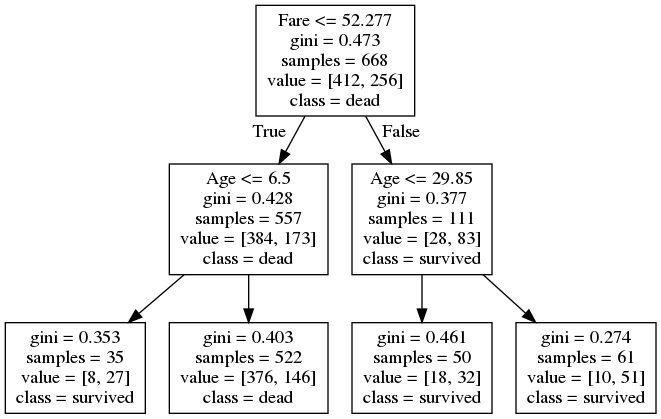

In [75]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=train_features.columns,  
                                class_names=['dead', 'survived']
                                )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Model Evaluation

In order to evaluate a machine learning model, we want to hold out part of the training data to evaluate the model. If we do not do this, we cannot know how the model is going to perform on the unseen data. 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(train_features, target, test_size=0.25, stratify=target,
                                                    random_state=42)

In [61]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)

In [62]:
predictions = clf.predict(X_test)
print(predictions[0:5])

[0 0 0 0 0]


In [63]:
accuracy_score(y_test, predictions)

0.6278026905829597

So what have we done?

1. We hold out 25% of the train set and do nothing with it
2. We train the decision tree on the other 75% of the data and create a decision tree
3. We make predictions on the 25% of the data based on this decision tree
4. We evaluate based on accuracy wethere or not the decision tree made the correct decision

Our accuracy is 62.7%, which is better then random :)

However we can vastly improve the model if we add more features / tune the model.

# Your turn!

Improve the machine learning model! Who in this workshop can get to the highest accuracy?

Some hypotheses to improve:

- What happens if we add more features that we created in the previous step?
- What happens if we tune the model, for example create a deeper tree?
- What happens if we use a different model? A decision tree is actually fairly naive and more sophisticated models have been developed.

